This notebook will cover the assumed knowledge of pandas.
Here's a few questions to check if you already know the material in this notebook.

1. Does a NumPy array have a single dtype or multiple dtypes?
2. Why is broadcasting useful?
3. How do you slice a DataFrame by row label?
4. How do you select a column of a DataFrame?
5. Is the Index a column in the DataFrame?

If you feel pretty comfortable with those, go ahead and skip this notebook.
[Answers](#Answers) are at the end. We'll meet up at the next notebook.

# Aside: Jupyter Notebook

- two modes command and edit
  - command -> edit: `Enter`
  - edit -> command: `Esc`
- `h` : Keyboard Shortcuts:  (from command mode)
- `j` / `k` : navigate cells
- `shift+Enter` executes a cell

Outline:

- [NumPy Foundation](#NumPy-Foundation)
- [Pandas](#Pandas)
- [Data Structures](#Data-Structures)

## Numpy Foundation

pandas is built atop NumPy, historically and in the actual library.
It's helpful to have a good understanding of some NumPyisms.

### ndarray

The core of numpy is the `ndarray`, N-dimensional array. These are singly-typed, fixed-length data containers.
NumPy also provides many convenient and fast methods implemented on the `ndarray`.

In [1]:
import numpy as np
import pandas as pd

x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [2]:
x.dtype

dtype('int32')

In [ ]:
y = np.array([[True, False], [False, True]])
y

In [ ]:
y.shape

### dtypes

Unlike python lists, NumPy arrays care about the type of data stored within.
The full list of NumPy dtypes can be found in the [NumPy documentation](http://docs.scipy.org/doc/numpy/user/basics.types.html).

![dtypes](http://docs.scipy.org/doc/numpy/_images/dtype-hierarchy.png)

We sacrifice the convinience of mixing bools and ints and floats within an array for much better performance.
However, an unexpected `dtype` change will probably bite you at some point in the future.

The two biggest things to remember are

- Missing values (NaN) cast integer or boolean arrays to floats
- NumPy arrays only have a single dtype for every element
- the object dtype is the fallback

You'll want to avoid object dtypes. It's typically slow.

### Vectorization

dtypes and vectorization are part of what make NumPy fast.

In [3]:
x = np.random.randint(0, 10, 10)
y = np.random.randint(0, 10, 10)
x, y

(array([6, 6, 4, 3, 5, 9, 9, 2, 1, 2]), array([6, 3, 5, 1, 7, 1, 8, 1, 6, 0]))

It's also *sometimes* a more convinient way of writing and thinking about things.

In [4]:
[i + j for i, j in zip(x, y)]

[12, 9, 9, 4, 12, 10, 17, 3, 7, 2]

In [5]:
x + y

array([12,  9,  9,  4, 12, 10, 17,  3,  7,  2])

### Broadcasting

It's super cool and super useful. The one-line explanation is that when doing elementwise operations, things expand to the "correct" shape.

In [6]:
# add a scalar to a 1-d array
x = np.arange(5)
print('x:  ', x)
print('x+1:', x + 1, end='\n\n')

y = np.random.uniform(size=(2, 5))
print('y:  ', y,  sep='\n')
print('y+1:', y + 1, sep='\n')

x:   [0 1 2 3 4]
x+1: [1 2 3 4 5]

y:  
[[ 0.98788756  0.78164797  0.91303731  0.10408171  0.15501514]
 [ 0.56677262  0.83243344  0.63269896  0.96800075  0.16353879]]
y+1:
[[ 1.98788756  1.78164797  1.91303731  1.10408171  1.15501514]
 [ 1.56677262  1.83243344  1.63269896  1.96800075  1.16353879]]


Since `x` is shaped `(5,)` and `y` is shaped `(2,5)` we can do operations between them.

In [7]:
x * y

array([[ 0.        ,  0.78164797,  1.82607462,  0.31224512,  0.62006055],
       [ 0.        ,  0.83243344,  1.26539792,  2.90400224,  0.65415515]])

Without broadcasting we'd have to manually reshape our arrays, which quickly gets annoying.

In [8]:
x.reshape(1, -1).repeat(2, axis=0) * y

array([[ 0.        ,  0.78164797,  1.82607462,  0.31224512,  0.62006055],
       [ 0.        ,  0.83243344,  1.26539792,  2.90400224,  0.65415515]])

# Pandas

We'll breeze through the basics here, and get onto some interesting applications in a bit. I want to provide the *barest* of intuition so things stick down the road.

## Why pandas?

NumPy is great. But it lacks a few things that are conducive to doing statisitcal analysis. By building on top of NumPy, pandas provides

- labeled arrays
- heterogenous data types within a table
- "better" missing data handling
- convenient methods (`groupby`, `rolling`, `resample`)
- more data types (Categorical, Datetime)

## Data Structures

This is the typical starting point for any intro to pandas.
We'll follow suit.

### The DataFrame

Here we have the workhorse data structure for pandas.
It's an in-memory table holding your data, and provides a few conviniences over lists of lists or NumPy arrays.

In [9]:
import numpy as np
import pandas as pd

In [10]:
# Many ways to construct a DataFrame
# We pass a dict of {column name: column values}
np.random.seed(42)
df = pd.DataFrame({'A': [1, 2, 3], 'B': [True, True, False],
                   'C': np.random.randn(3)},
                  index=['a', 'b', 'c'])  # also this weird index thing
df

,A,B,C
a,1,True,0.496714
b,2,True,-0.138264
c,3,False,0.647689


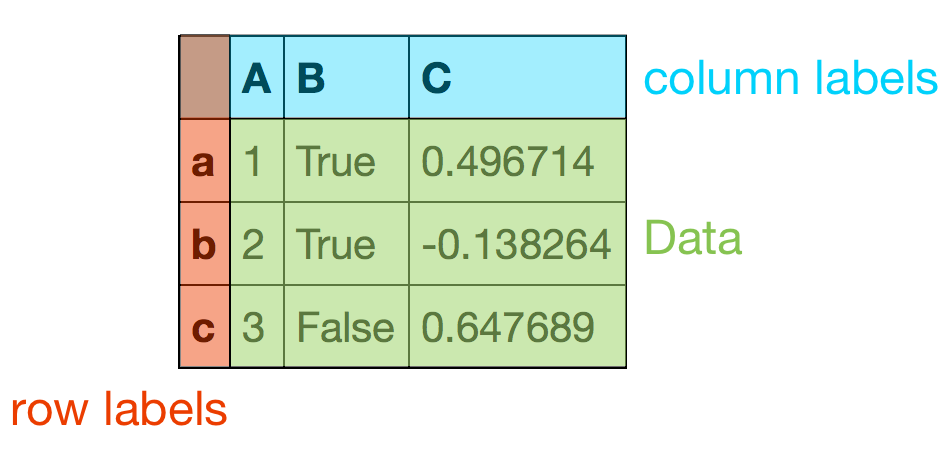

In [11]:
from IPython.display import Image

Image('figures/dataframe.png')

Notice that we can store a column of intergers, a column of booleans, and a column of floats in the same `DataFrame`.

### Indexing

Our first improvement over numpy arrays is labeled indexing. We can select subsets by column, row, or both. Column selection uses the regular python `__getitem__` machinery. Pass in a single column label `'A'` or a list of labels `['A', 'C']` to select subsets of the original `DataFrame`.

In [12]:
# Single column, reduces to a Series
df['A']

a    1
b    2
c    3
Name: A, dtype: int64

In [13]:
cols = ['A', 'C']
df[cols]

,A,C
a,1,0.496714
b,2,-0.138264
c,3,0.647689


For row-wise selection, use the special `.loc` accessor.

In [17]:
df.loc[['a', 'b']]

,A,B,C
a,1,True,0.496714
b,2,True,-0.138264


You can use ranges to select rows or columns.

In [18]:
df.loc['a':'b']

,A,B,C
a,1,True,0.496714
b,2,True,-0.138264


Notice that the slice is *inclusive* on both sides,  unlike your typical slicing of a list. Sometimes, you'd rather slice by *position* instead of label. `.iloc` has you covered:

In [19]:
df.iloc[[0, 1]]

,A,B,C
a,1,True,0.496714
b,2,True,-0.138264


In [20]:
df.iloc[:2]

,A,B,C
a,1,True,0.496714
b,2,True,-0.138264


This follows the usual python slicing rules: closed on the left, open on the right.

As I mentioned, you can slice both rows and columns. Use `.loc` for label or `.iloc` for position indexing.

In [21]:
df.loc['a', 'B']

True

Pandas, like NumPy, will reduce dimensions when possible. Select a single column and you get back `Series` (see below). Select a single row and single column, you get a scalar.

You can get pretty fancy:

In [22]:
df.loc['a':'b', ['A', 'C']]

,A,C
a,1,0.496714
b,2,-0.138264


#### Summary

- Use `[]` for selecting columns
- Use `.loc[row_lables, column_labels]` for label-based indexing
- Use `.iloc[row_positions, column_positions]` for positional index

I've left out boolean and hierarchical indexing, which we'll see later.

## Series

You've already seen some `Series` up above. It's the 1-dimensional analog of the DataFrame. Each column in a `DataFrame` is in some sense a `Series`. You can select a `Series` from a DataFrame in a few ways:

In [23]:
# __getitem__ like before
df['A']

a    1
b    2
c    3
Name: A, dtype: int64

In [24]:
# .loc, like before
df.loc[:, 'A']

a    1
b    2
c    3
Name: A, dtype: int64

In [25]:
# using `.` attribute lookup
df.A

a    1
b    2
c    3
Name: A, dtype: int64

In [26]:
df['mean'] = ['a', 'b', 'c']

In [27]:
df.mean

<bound method DataFrame.mean of    A      B         C mean
a  1   True  0.496714    a
b  2   True -0.138264    b
c  3  False  0.647689    c>

In [28]:
df['mean']

a    a
b    b
c    c
Name: mean, dtype: object

You'll have to be careful with the last one. It won't work if you're column name isn't a valid python identifier (say it has a space) or if it conflicts with one of the (many) methods on `DataFrame`. The `.` accessor is extremely convient for interactive use though.

You should never *assign* a column with `.` e.g. don't do

```python
# bad
df.A = [1, 2, 3]
```

It's unclear whether your attaching the list `[1, 2, 3]` as an attribute of `df`, or whether you want it as a column. It's better to just say

```python
df['A'] = [1, 2, 3]
# or
df.loc[:, 'A'] = [1, 2, 3]
```

`Series` share many of the same methods as `DataFrame`s.

## Index

`Index`es are something of a peculiarity to pandas.
First off, they are not the kind of indexes you'll find in SQL, which are used to help the engine speed up certain queries.
In pandas, `Index`es are about lables. This helps with selection (like we did above) and automatic alignment when performing operations between two `DataFrame`s or `Series`.

R does have row labels, but they're nowhere near as powerful (or complicated) as in pandas. You can access the index of a `DataFrame` or `Series` with the `.index` attribute.

In [29]:
df.index

Index(['a', 'b', 'c'], dtype='object')

In [30]:
df.columns

Index(['A', 'B', 'C', 'mean'], dtype='object')

There are special kinds of `Index`es that you'll come across. Some of these are

- `MultiIndex` for multidimensional (Hierarchical) labels
- `DatetimeIndex` for datetimes
- `Float64Index` for floats
- `CategoricalIndex` for, you guessed it, `Categorical`s

We'll talk *a lot* more about indexes. They're a complex topic and can introduce headaches.

<blockquote class="twitter-tweet" lang="en"><p lang="en" dir="ltr"><a href="https://twitter.com/gjreda">@gjreda</a> <a href="https://twitter.com/treycausey">@treycausey</a> in some cases row indexes are the best thing since sliced bread, in others they simply get in the way. Hard problem</p>&mdash; Wes McKinney (@wesmckinn) <a href="https://twitter.com/wesmckinn/status/547177248768659457">December 22, 2014</a></blockquote>

Pandas, for better or for worse, does usually provide ways around row indexes being obstacles. The problem is knowing *when* they are just getting in the way, which mostly comes by experience. Sorry.

# Answers

1. Does a NumPy array have a single dtype or multiple dtypes?
  - NumPy arrays are homogenous: they only have a single dtype (unlike DataFrames).
  You can have an array that holds mixed types, e.g. `np.array(['a', 1])`, but the
  dtype of that array is `object`, which you probably want to avoid.
2. Why is broadcasting useful?
  - It lets you perform operations between arrays that are compatable, but not nescessarily identical,
  in shape. This makes your code cleaner.
3. How do you slice a DataFrame by row label?
  - Use `.loc[label]`. For position based use `.iloc[integer]`.
4. How do you select a column of a DataFrame?
  - Standard `__getitem__`: `df[column_name]`
5. Is the Index a column in the DataFrame?
  - No. It isn't included in any operations (`mean`, etc). It can be inserted as a regular
  column with `df.reset_index()`.